In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [2]:
train_data_file_name = ('../input/titanic/train.csv')
train_dataframe = pd.read_csv(train_data_file_name) 

In [3]:
train_dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data_file_name = '../input/titanic/test.csv'
test_dataframe = pd.read_csv(test_data_file_name)
test_dataframe

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
test_data_file_name = '../input/titanic/gender_submission.csv'
test_dataframe = pd.read_csv(test_data_file_name)
test_dataframe

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
train_subdataframe = train_dataframe[['Survived', 'Sex', 'Age', 'Cabin','SibSp','Parch']] 
train_subdataframe 

,Survived,Sex,Age,Cabin,SibSp,Parch
0,0,male,22.0,NaN,1,0
1,1,female,38.0,C85,1,0
2,1,female,26.0,NaN,0,0
3,1,female,35.0,C123,1,0
4,0,male,35.0,NaN,0,0
...,...,...,...,...,...,...
886,0,male,27.0,NaN,0,0
887,1,female,19.0,B42,0,0
888,0,female,NaN,NaN,1,2
889,1,male,26.0,C148,0,0


In [7]:
train_subdataframe[train_subdataframe['Survived'].isnull()]

,Survived,Sex,Age,Cabin,SibSp,Parch


In [8]:
train_subdataframe[train_subdataframe['Sex'].isnull()]

,Survived,Sex,Age,Cabin,SibSp,Parch


In [9]:
train_subdataframe[train_subdataframe['Age'].isnull()]

,Survived,Sex,Age,Cabin,SibSp,Parch
5,0,male,NaN,NaN,0,0
17,1,male,NaN,NaN,0,0
19,1,female,NaN,NaN,0,0
26,0,male,NaN,NaN,0,0
28,1,female,NaN,NaN,0,0
...,...,...,...,...,...,...
859,0,male,NaN,NaN,0,0
863,0,female,NaN,NaN,8,2
868,0,male,NaN,NaN,0,0
878,0,male,NaN,NaN,0,0


In [10]:
train_subdataframe[train_subdataframe['Cabin'].isnull()]

,Survived,Sex,Age,Cabin,SibSp,Parch
0,0,male,22.0,NaN,1,0
2,1,female,26.0,NaN,0,0
4,0,male,35.0,NaN,0,0
5,0,male,NaN,NaN,0,0
7,0,male,2.0,NaN,3,1
...,...,...,...,...,...,...
884,0,male,25.0,NaN,0,0
885,0,female,39.0,NaN,0,5
886,0,male,27.0,NaN,0,0
888,0,female,NaN,NaN,1,2


In [11]:
train_subdataframe[train_subdataframe['SibSp'].isnull()]

,Survived,Sex,Age,Cabin,SibSp,Parch


In [12]:
train_subdataframe[train_subdataframe['Parch'].isnull()]

,Survived,Sex,Age,Cabin,SibSp,Parch


In [13]:
train_subdataframe = train_subdataframe.dropna() 
train_subdataframe

,Survived,Sex,Age,Cabin,SibSp,Parch
1,1,female,38.0,C85,1,0
3,1,female,35.0,C123,1,0
6,0,male,54.0,E46,0,0
10,1,female,4.0,G6,1,1
11,1,female,58.0,C103,0,0
...,...,...,...,...,...,...
871,1,female,47.0,D35,1,1
872,0,male,33.0,B51 B53 B55,0,0
879,1,female,56.0,C50,0,1
887,1,female,19.0,B42,0,0


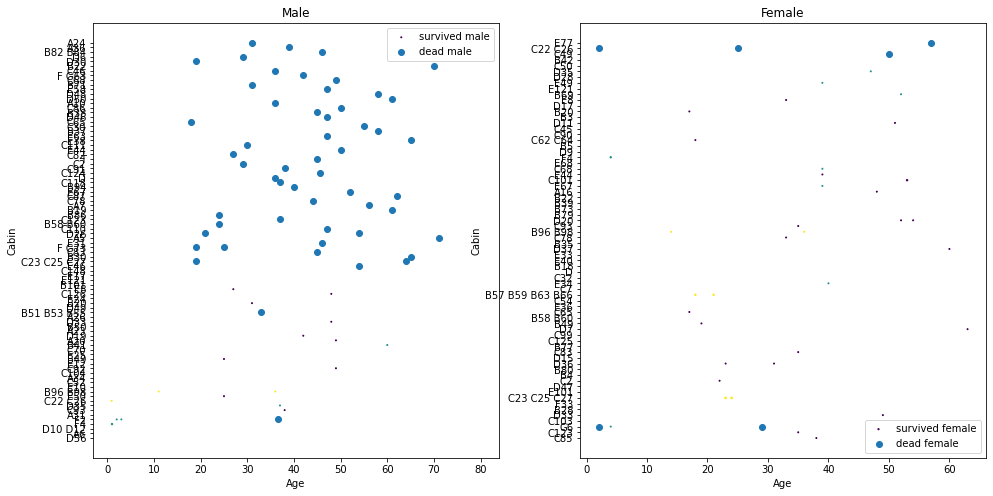

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
survived_male_dataframe = train_subdataframe[(train_subdataframe['Survived'] == 1) & (train_subdataframe['Sex'] == 'male')]
_ = plt.scatter(survived_male_dataframe['Age'], survived_male_dataframe['Cabin'], survived_male_dataframe['SibSp'], survived_male_dataframe['Parch'],label='survived male')
dead_male_dataframe = train_subdataframe[(train_subdataframe['Survived'] == 0) & (train_subdataframe['Sex'] == 'male')]
_ = plt.scatter(dead_male_dataframe['Age'], dead_male_dataframe['Cabin'], label='dead male')
plt.title('Male')
plt.xlabel('Age')
plt.ylabel('Cabin')
_ = plt.legend()

plt.subplot(1, 2, 2)
survived_female_dataframe = train_subdataframe[(train_subdataframe['Survived'] == 1) & (train_subdataframe['Sex'] == 'female')]
_ = plt.scatter(survived_female_dataframe['Age'], survived_female_dataframe['Cabin'], survived_female_dataframe['SibSp'], survived_female_dataframe['Parch'],label='survived female')
dead_female_dataframe = train_subdataframe[(train_subdataframe['Survived'] == 0) & (train_subdataframe['Sex'] == 'female')]
_ = plt.scatter(dead_female_dataframe['Age'], dead_female_dataframe['Cabin'], label='dead female')
plt.title('Female')
plt.xlabel('Age')
plt.ylabel('Cabin')
_ = plt.legend()